In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.4, 0.99, 'b)')

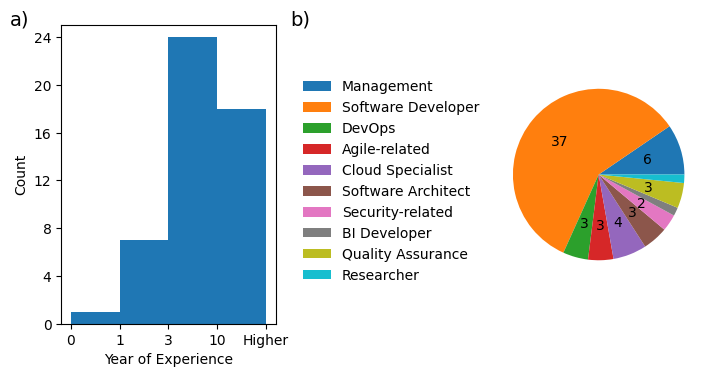

In [3]:
def func(pct, allvals, withone):
    absolute = int(np.round(pct/100.*np.sum(np.array(allvals))))
    if not withone and absolute <= 1: return ''
    return f"{absolute:d}"

experienceData = [1, 7, 24, 18]
roles = {
    "Management": 6,
    "Software Developer": 37,
    "DevOps": 3,
    "Agile-related": 3,
    "Cloud Specialist":4,
    "Software Architect": 3,
    "Security-related": 2,
    "BI Developer": 1,
    "Quality Assurance": 3,
    "Researcher": 1
}

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), layout="constrained")

axs[0].stairs(experienceData, edges=['0', '1', '3', '10', 'Higher'], fill=True)
axs[0].set_yticks(np.arange(0, 25, 4))
axs[0].set_ylim(0, 25)
axs[0].set_ylabel("Count", fontsize=10)

axs[0].set_xlabel("Year of Experience", fontsize=10)

axs[1].pie(roles.values(), labels=None, autopct=lambda curr: func(curr, [i for i in roles.values()], False))
axs[1].legend(roles.keys(), loc="best")
axs[1].legend(roles.keys(), 
           ncols=1, 
           frameon = False,
           bbox_to_anchor=(0, 1, 0, 0))
fig.text(0, 0.99, 'a)', fontsize=14)
fig.text(0.4, 0.99, 'b)', fontsize=14)

#fig.savefig('./image/stats.png', bbox_inches='tight', dpi=300)

Text(0.5, 0, 'Domain')

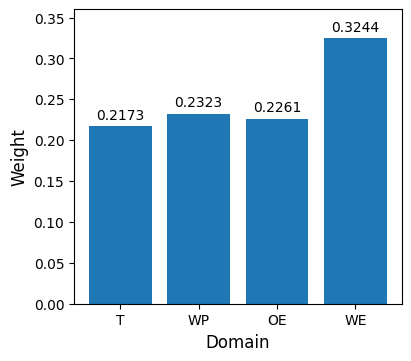

In [4]:
overallAHP  = [0.2173,	0.2323,	0.2261,	0.3244]
domains = ["T", "WP", "OE", "WE"]


fig, ax= plt.subplots(figsize=(4, 3.5), layout="constrained")

rects = ax.bar(x= domains, 
           height=overallAHP)
ax.bar_label(rects, padding=3)

ax.set_yticks(np.arange(0, 0.36, 0.05))
ax.set_ylim(0, 0.36)
ax.set_ylabel("Weight", fontsize=12)
ax.set_xlabel("Domain", fontsize=12)

#fig.savefig('./image/overallAHP.png', bbox_inches='tight', dpi=300)

Text(0.505, 0.99, 'b)')

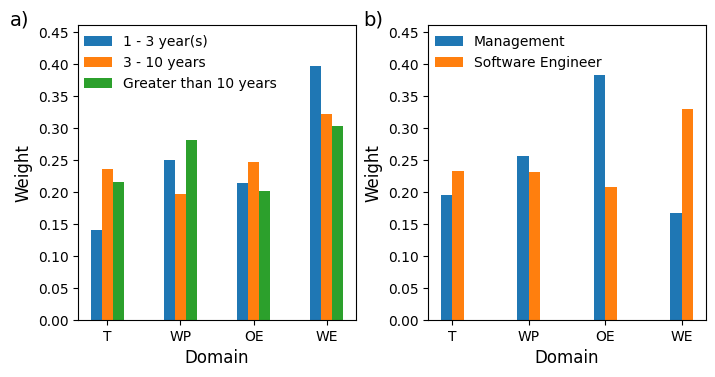

In [5]:
domains = ["T", "WP", "OE", "WE"]
yoeScores = {
    "1 - 3 year(s)": [0.1401, 0.2497, 0.2134, 0.3967],
    "3 - 10 years": [0.2357,	0.1960,	0.2466,	0.3217],
    "Greater than 10 years" : [0.2152,	0.2807,	0.2012,	0.3029]
}

roleScores= {
    "Management": [0.1948,	0.2552,	0.3829,	0.1671],
    "Software Engineer": [0.2322,	0.2314,	0.2073,	0.3290]
}


fig, axs= plt.subplots(1, 2, figsize=(7, 3.5), layout="constrained")

width = 0.15  # the width of the bars
multiplier = 0
x = np.arange(len(domains))

for attribute, measurement in yoeScores.items():
    offset = width * multiplier
    rects = axs[0].bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

for attribute, measurement in roleScores.items():
    offset = width * multiplier
    rects = axs[1].bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

axs[0].set_ylabel('Weight', fontsize=12)
axs[0].set_xlabel('Domain', fontsize=12)
axs[0].set_xticks(x + width, domains)
axs[0].set_yticks(np.arange(0, 0.46, 0.05))
axs[0].legend(bbox_to_anchor=(0.26, 0.01, 0.5, 1), ncols=1, frameon = False)
axs[0].set_ylim(0, 0.46)


axs[1].set_ylabel('Weight', fontsize=12)
axs[1].set_xlabel('Domain', fontsize=12)
axs[1].set_xticks(x + width * 3.5, domains)
axs[1].set_yticks(np.arange(0, 0.46, 0.05))
axs[1].legend(bbox_to_anchor=(0.17, 0.01, 0.5, 1), ncols=1, frameon = False)
axs[1].set_ylim(0, 0.46)

fig.text(0, 0.99, 'a)', fontsize=14)
fig.text(0.505, 0.99, 'b)', fontsize=14)

#fig.savefig('./image/detailAHP.png', bbox_inches='tight', dpi=300)

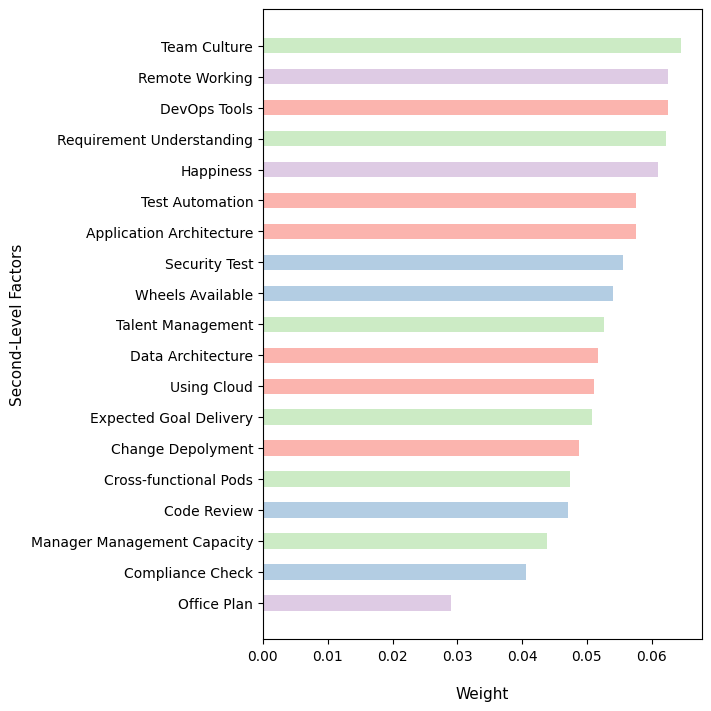

In [7]:

fig, ax = plt.subplots(1, figsize=(7, 7), layout="constrained")

cmap = plt.get_cmap('Pastel1')
colors = cmap(np.arange(4))

techTicks = ["Application Architecture", "Data Architecture", "Using Cloud", "Change Depolyment", "DevOps Tools", "Test Automation"]
techHeight = [0.05760, 0.05172, 0.05105, 0.04870, 0.06247, 0.05760]

wpTicks = ["Code Review", "Security Test", "Compliance Check", "Wheels Available"]
wpHeight = [0.04702, 0.05558, 0.04064, 0.05407]

oeTicks = ["Cross-functional Pods", "Expected Goal Delivery", "Team Culture", "Manager Management Capacity", "Requirement Understanding", "Talent Management"]
oeHeight = [0.04736, 0.05071, 0.06448, 0.04383, 0.06213, 0.05256]

weTicks = ["Remote Working", "Office Plan", "Happiness"]
weHeights = [0.06247, 0.02905, 0.06096]

combinedTicks = [techTicks, wpTicks, oeTicks, weTicks]
combinedHeights = [techHeight, wpHeight, oeHeight, weHeights]
heightsWithIdx = []

for i in range(len(combinedTicks)):
    for j in range(len(combinedTicks[i])):
        heightsWithIdx.append((i, j, combinedHeights[i][j]))

heightsWithIdx.sort(key=lambda x: x[2], reverse=False)

groups, indices, values = zip(*heightsWithIdx)

for i in range(len(groups)):
    plt.barh(combinedTicks[groups[i]][indices[i]], values[i], color=colors[groups[i]], height=0.5)

ax.set_xlabel('\nWeight', fontsize=11)
ax.set_ylabel('Second-Level Factors', fontsize=11)

fig.savefig('./image/detailedSAW.png', bbox_inches='tight', dpi=300)